# Leitura e visualização do COSIPY

## Importar bibliotecas **`xarray`**

In [1]:
import xarray as xr
import rasterio as rs
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt

## Ler resultados do COSIPY

In [2]:
ds = xr.open_dataset('./COSIPY_out/BELL_ERA5_20130101-20130831.nc')

In [3]:
ds

<xarray.Dataset>
Dimensions:       (time: 972, lat: 18, lon: 34)
Coordinates:
  * time          (time) datetime64[ns] 2013-01-01 ... 2013-08-31T18:00:00
  * lat           (lat) float64 -62.19 -62.18 -62.18 ... -62.15 -62.15 -62.14
  * lon           (lon) float64 -58.93 -58.93 -58.92 ... -58.85 -58.85 -58.85
Data variables: (12/37)
    HGT           (lat, lon) float32 ...
    MASK          (lat, lon) float32 ...
    SLOPE         (lat, lon) float32 ...
    ASPECT        (lat, lon) float32 ...
    T2            (time, lat, lon) float64 ...
    RH2           (time, lat, lon) float64 ...
    ...            ...
    CONDENSATION  (time, lat, lon) float64 ...
    DEPOSITION    (time, lat, lon) float64 ...
    REFREEZE      (time, lat, lon) float64 ...
    subM          (time, lat, lon) float64 ...
    Z0            (time, lat, lon) float64 ...
    surfM         (time, lat, lon) float64 ...
Attributes: (12/63)
    Start_from_restart_file:                    False
    Stake_evaluation:                           False
    WRF_simulation:                             False
    Compression_level:                          2
    Slurm_use:                                  False
    Full_fiels:                                 False
    ...                                         ...
    water_density:                              1000.0
    ice_density:                                910.0
    air_density:                                1.1
    sigma:                                      5.67e-08
    zero_temperature:                           273.16
    Surface_emission_coeff:                     0.99

## Ler imagem do google earth de alta resolução 

In [4]:
tif_file = "../data/IMG_BELL.tif" 

#Extraemos el fondo en rgb
with rs.open(tif_file) as src:
	tiff_image, g, b = src.read(1), src.read(2), src.read(3)
	transform = src.transform

rgb_image = np.dstack((tiff_image, g, b))


## Ler shapefile da geleira 

In [5]:
shape = gpd.read_file('../data/Shapefiles/BEL_GLA.shp') 

## Calcular o balanço de massa superficial 

In [6]:
lat = ds["lat"].values
lon = ds["lon"].values

smb = ds['MB'].sum(dim = 'time').where(ds['MASK']==1)
color = "seismic_r"
alpha = 0.5

## Gerar a figura do balanço de massa

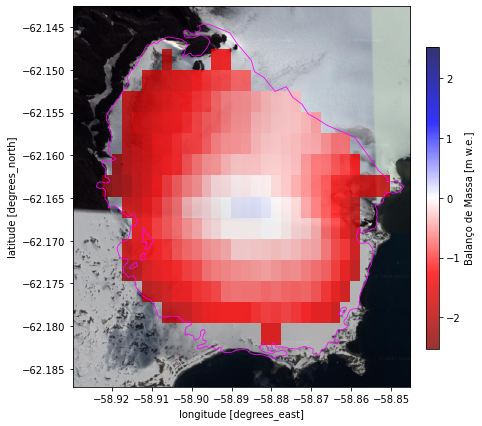

In [7]:
fig = plt.figure(figsize = (7,7)) 

ax1 = fig.add_subplot()

ax1.imshow(rgb_image, extent = (transform[2], transform[2] + transform[0] * tiff_image.shape[1],transform[5] + transform[4] * tiff_image.shape[0], transform[5]))
pl1 = smb.plot(ax=ax1, cmap= "seismic_r", alpha = 0.8, add_colorbar=False,)
shape.boundary.plot(ax=ax1, edgecolor='magenta', linewidth=0.8)

cbar_ax = fig.add_axes([0.88, 0.2, 0.025, 0.6])
cbar = fig.colorbar(pl1, cax=cbar_ax)
cbar.set_label('Balanço de Massa [m w.e.]')

# Salvar uma figura
fig.savefig('fig/SMB_20130101-20130831_sum.png', dpi = 300, facecolor='w', bbox_inches = 'tight', 
            pad_inches = 0.1)